In [1]:
using ModelingToolkit
using LinearAlgebra
using OrdinaryDiffEq
using Plots

In [2]:
function pendulum!(du, u, p, t)
    x, dx, y, dy, T = u
    g, L = p
    du[1] = dx
    du[2] = T * x
    du[3] = dy
    du[4] = T * y - g
    du[5] = x^2 + y^2 - L^2
    return nothing
end

pendulum! (generic function with 1 method)

In [3]:
pendulum_fun! = ODEFunction(pendulum!, mass_matrix=Diagonal([1, 1, 1, 1, 0]))
u0 = [1.0, 0, 0, 0, 0]
p = [9.8, 1]
tspan = (0, 10.0)
pendulum_prob = ODEProblem(pendulum_fun!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: true
timespan: (0.0, 10.0)
u0: 5-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0

In [9]:
solve(pendulum_prob, Rosenbrock23())

┌ Warning: At t=1.1897523108151333, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = 2159.3491401773254. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/YE7xF/src/integrator_interface.jl:657


retcode: Unstable
Interpolation: specialized 2nd order "free" stiffness-aware interpolation
t: 25448-element Vector{Float64}:
 0.0
 1.0e-6
 1.1e-5
 0.00011099999999999999
 0.0006790723777361654
 0.001247144755472331
 0.0019431599154522347
 0.0026391750754321385
 0.0034179943814783287
 0.004196813687524519
 0.004975632993570709
 0.005754452299616899
 0.006395429000341529
 ⋮
 1.1812208047539
 1.181543481457907
 1.1818972730918196
 1.1822902674554
 1.1827344739667245
 1.183248978029554
 1.1838670659582544
 1.1846551775209975
 1.1857662291597386
 1.1873092745056715
 1.1885055467876633
 1.1897523108151333
u: 25448-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0]
 [1.0, 0.0, -4.9000000000000005e-12, -9.800000000000001e-6, 0.0]
 [1.0, -5.282200000000001e-16, -5.929e-10, -0.0001078, -2.4833892946968803e-11]
 [0.9999999999999992, -2.6528372584972075e-11, -6.037289999999999e-8, -0.0010878, -8.864649521505195e-7]
 [0.9999999999988476, -6.511024201293182e-9, -2.259582541600649e-6, -0.00

In [ ]:
traced_sys = modelingtoolkitize(pendulum_prob)

Model ##MTKizedODE#238:
Equations (5):
  5 standard: see equations(##MTKizedODE#238)
Unknowns (5): see unknowns(##MTKizedODE#238)
  x₁(t) [defaults to 1.0]
  x₂(t) [defaults to 0.0]
  x₃(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  x₅(t) [defaults to 0.0]
Parameters (2): see parameters(##MTKizedODE#238)
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]

In [5]:
pendulum_sys = mtkcompile(dae_index_lowering(traced_sys))

Model ##MTKizedODE#238:
Equations (5):
  5 standard: see equations(##MTKizedODE#238)
Unknowns (5): see unknowns(##MTKizedODE#238)
  x₅(t) [defaults to 0.0]
  x₃(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  x₂(t) [defaults to 0.0]
  x₁(t) [defaults to 1.0]
Parameters (2): see parameters(##MTKizedODE#238)
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]

In [6]:
prob = ODEProblem(pendulum_sys, [], tspan)
sol = solve(prob, Rodas5P(), abstol=1e-8, reltol=1e-8)

┌ Warning: Initialization system is overdetermined. 2 equations for 0 unknowns. Initialization will default to using least squares. `SCCNonlinearProblem` can only be used for initialization of fully determined systems and hence will not be used here. To suppress this warning pass warn_initialize_determined = false. To make this warning into an error, pass fully_determined = true
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/bdYND/src/problems/initializationproblem.jl:106


retcode: Success
Interpolation: specialized 4th (Rodas6P = 5th) order "free" stiffness-aware interpolation
t: 5885-element Vector{Float64}:
  0.0
  8.820490580568942e-7
  1.1305014555891484e-6
  1.3789538531214025e-6
  1.6915316787116988e-6
  2.1502965001609697e-6
  2.8783820404427622e-6
  3.896377133997462e-6
  5.347182593843697e-6
  7.050721914091127e-6
  9.467425605456964e-6
  1.2139122240573292e-5
  1.5871181407133975e-5
  ⋮
  9.96425601104523
  9.967948225757173
  9.971640440469116
  9.97533265518106
  9.979024869893003
  9.982346737708852
  9.985668605524701
  9.98899047334055
  9.9923123411564
  9.995634208972248
  9.998956076788097
 10.0
u: 5885-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 1.0]
 [2.353916920364319e-8, 2.409580544488107e-9, -8.644080768957695e-6, 3.199780977062099e-15, 1.0]
 [-1.819109093418456e-9, -1.7309864817676007e-10, -1.1078914264773797e-5, 2.7482280349864687e-15, 1.0]
 [2.6763563206707957e-9, 2.9173241828649434e-10, -1.3513747760589899e-5, 3.483

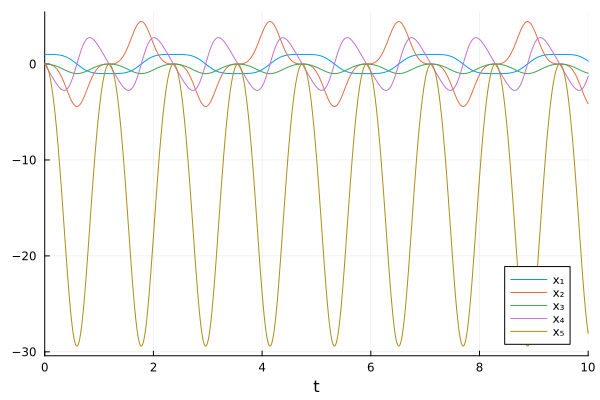

In [7]:
plot(sol, idxs=unknowns(traced_sys))